## matplotlib 

matplotlib是一个用于创建出版质量图表的桌面绘图包（主要是2D方面）。该项目是由John Hunter于2002年启动的，其目的是为Python构建一个MATLAB式的绘图接口。

随着时间的发展，matplotlib衍生出了多个数据可视化的工具集，它们使用matplotlib作为底层。其中之一是seaborn（http://seaborn.pydata.org/）

#### matplotlib API入门

matplotlib的通常引入约定是"import matplotlib.pyplot as plt"

%matplotlib inline 用在jupyter在线显示

plt.plot(data)用来画
 

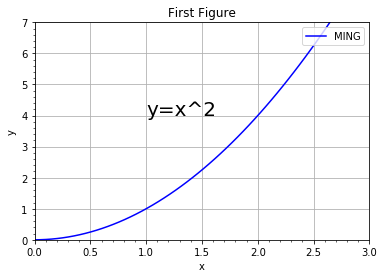

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# x轴对应的值
x = np.linspace(0, 5, 100)

# 画图，并设置线形和颜色。 b代表 blue，- 代表线型
plt.plot(x, x**2, 'b-')

# 设置x轴和y轴的名字
plt.ylabel('y')
plt.xlabel('x')

# 设置标题
plt.title("First Figure")

# 设置栅格
plt.grid(True)

# 设置坐标范围
plt.xlim(0, 3)
plt.ylim(0, 7)

# 在指定坐标处，标注文字
plt.text(1, 4, r'y=x^2', fontsize=20)

# 添加图例，注意是个tuple，加逗号
plt.legend(('MING',),loc='upper right')

# 设置刻度标签
#lables=[x for x in range(3)]
#plt.xticks(x,lables)

# 打开次刻度
plt.minorticks_on()

# 显示图片，在NoteBook中可以不写
plt.show()

#### Figure和Subplot

matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure


~~~
# 第一种写法
ax = plt.subplot(2, 2, 1)

# 第二种写法
ax = plt.subplot2grid((2, 2), (0, 0))

# 第三种写法: GridSpec
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 0])
~~~

add_subplot创建一个或多个subplot,fig.add_subplot(2, 2, 1)图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个

fig, axes = plt.subplots(2, 3)，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组

利用Figure的subplots_adjust方法可以轻而易举地修改间距
~~~
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
~~~

wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。

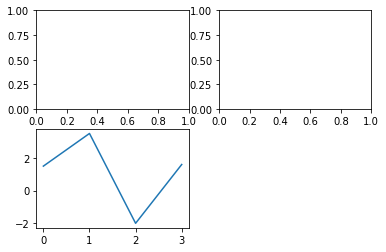

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot([1.5, 3.5, -2, 1.6])

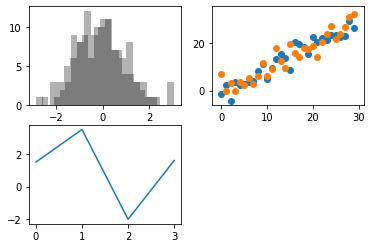

In [9]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
fig

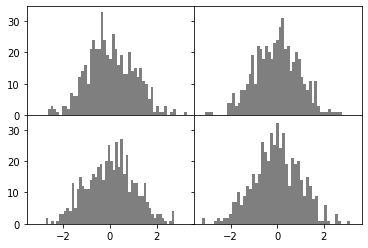

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

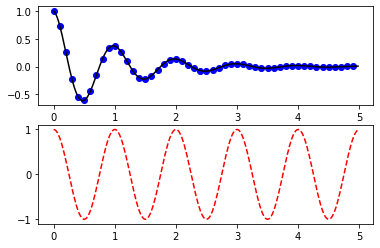

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def fig(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
# 等同于 plt.subplot(2, 1，1)
plt.subplot(211)
plt.plot(t1, fig(t1), 'bo', t2, fig(t2), 'k')

# 等同于 plt.subplot(2, 1，2)
plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

####  子图

子图（axes），和子区(subplot)非常相似，一个子图可能是由一个或多个子区域构成的。它比子区更加灵活。

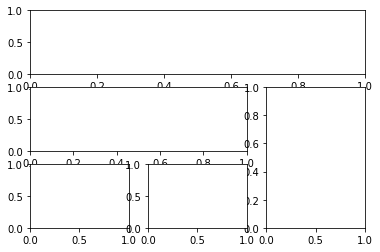

In [51]:
axes1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
axes2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
axes3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
axes4 = plt.subplot2grid((3, 3), (2, 0))
axes5 = plt.subplot2grid((3, 3), (2, 1))

子图的灵活性更高呢，因为它允许把图片放置到图像(figure)中的任何地方（如下图）。所以如果我们想要在一个大图片中嵌套一个小点的图片，我们通过子图(axes)来完成它

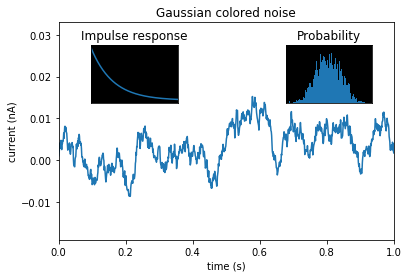

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1 * np.min(s), 2 * np.max(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], facecolor='k')
n, bins, patches = plt.hist(s, 400, density=True)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
b = plt.axes([0.2, 0.6, .2, .2], facecolor='k')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

#### 颜色、标记和线型

matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码
~~~
ax.plot(x, y, 'g--')
~~~

线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面

~~~
ax.plot(x, y, linestyle='--', color='g')

plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
~~~


#### 刻度、标签和图例

pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法。它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：
1. 调用时不带参数，则返回当前的参数值
2. 调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）。

所有这些方法都是对当前或最近创建的AxesSubplot起作用的。

除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他图形等。注解和文字可以通过text、arrow和annotate函数进行添加

Text(0, 0.5, 'Stages')

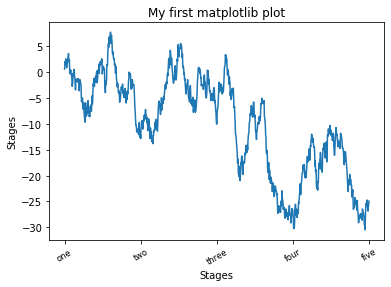

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Stages')


#### 将图表保存到文件
~~~
plt.savefig('figpath.svg')
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
~~~

#### 折线图

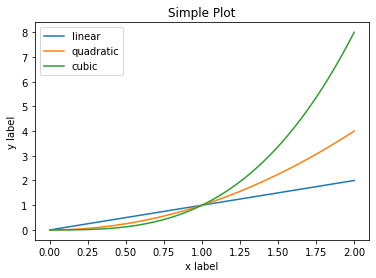

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

#### 散点图
其实散点图和折线图是一样的原理，将散点图里的点用线连接起来就是折线图了。

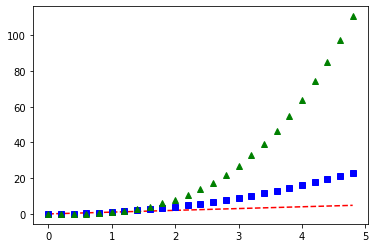

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0., 5., 0.2)

# 红色破折号, 蓝色方块 ，绿色三角块
plt.plot(x, x, 'r--', x, x**2, 'bs', x, x**3, 'g^')
plt.show()

#### 直方图


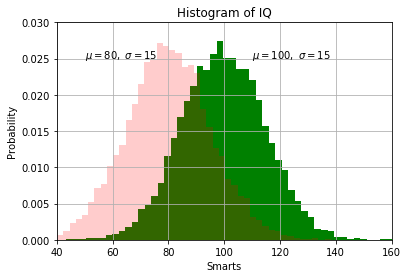

In [41]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

mu1, sigma1 = 100, 15
mu2, sigma2 = 80, 15
x1 = mu1 + sigma1 * np.random.randn(10000)
x2 = mu2 + sigma2 * np.random.randn(10000)

# the histogram of the data
# 50：将数据分成50组
# facecolor：颜色；alpha：透明度
# density：是密度而不是具体数值
n1, bins1, patches1 = plt.hist(x1, 50, density=True, facecolor='g', alpha=1)
n2, bins2, patches2 = plt.hist(x2, 50, density=True, facecolor='r', alpha=0.2)

# n：概率值；bins：具体数值；patches：直方图对象。

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')

plt.text(110, .025, r'$\mu=100,\ \sigma=15$')
plt.text(50, .025, r'$\mu=80,\ \sigma=15$')

# 设置x，y轴的具体范围
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

#### 并列柱状图

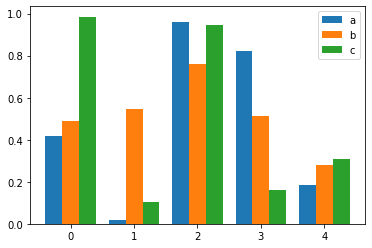

In [42]:
import numpy as np
import matplotlib.pyplot as plt
size = 5
a = np.random.random(size)
b = np.random.random(size)
c = np.random.random(size)
x = np.arange(size)

# 有多少个类型，只需更改n即可
total_width, n = 0.8, 3
width = total_width / n

# 重新拟定x的坐标
x = x - (total_width - width) / 2

# 这里使用的是偏移
plt.bar(x, a,  width=width, label='a')
plt.bar(x + width, b, width=width, label='b')
plt.bar(x + 2 * width, c, width=width, label='c')
plt.legend()
plt.show()

#### 叠加柱状图

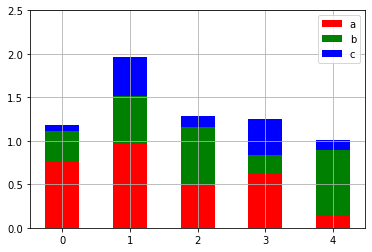

In [43]:
import numpy as np
import matplotlib.pyplot as plt

size = 5
a = np.random.random(size)
b = np.random.random(size)
c = np.random.random(size)

x = np.arange(size)

# 这里使用的是偏移
plt.bar(x, a, width=0.5, label='a',fc='r')
plt.bar(x, b, bottom=a, width=0.5, label='b', fc='g')
plt.bar(x, c, bottom=a+b, width=0.5, label='c', fc='b')

plt.ylim(0, 2.5)
plt.legend()
plt.grid(True)
plt.show()

#### 普通饼图

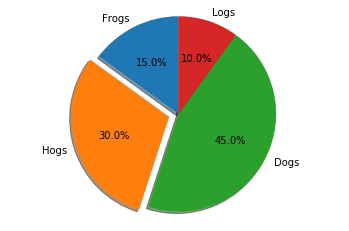

In [44]:
import matplotlib.pyplot as plt

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

# 设置分离的距离，0表示不分离
explode = (0, 0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio 保证画出的图是正圆形
plt.axis('equal')

plt.show()

#### 热点图(heat map)



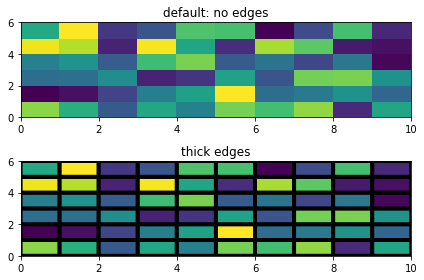

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

Z = np.random.rand(6, 10)

fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.pcolor(Z)
ax0.set_title('default: no edges')

c = ax1.pcolor(Z, edgecolors='k', linewidths=4)
ax1.set_title('thick edges')

fig.tight_layout()
plt.show()

#### 绘制三维散点图

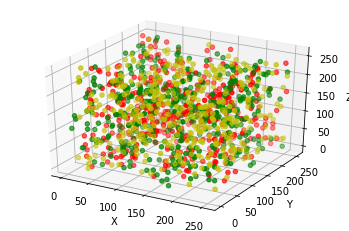

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.random.randint(0, 255, size=[40, 40, 40])

x, y, z = data[0], data[1], data[2]
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x[:10], y[:10], z[:10], c='y')  # 绘制数据点
ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
ax.scatter(x[30:40b], y[30:40], z[30:40], c='g')

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

#### 三维平面图

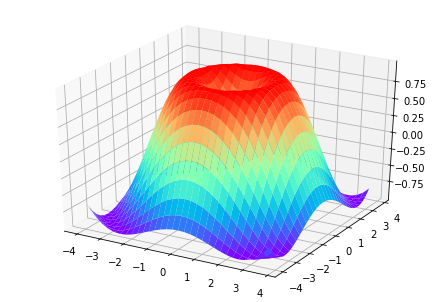

In [48]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

plt.show()

#### 实时更新图

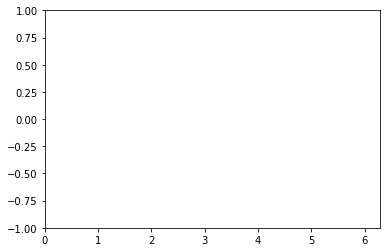

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r-', animated=False)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
#plt.show()




In [ ]:
import matplotlib.pyplot as plt

ax = []                    # 定义一个 x 轴的空列表用来接收动态的数据
ay = []                    # 定义一个 y 轴的空列表用来接收动态的数据
plt.ion()                  # 开启一个画图的窗口
for i in range(100):
    ax.append(i)
    ay.append(i**2)
    plt.clf()                # 清除之前画的图
    plt.plot(ax,ay)
    plt.pause(0.1)
    plt.ioff()            # 关闭画图的窗口